In [10]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import ZGate
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

In [43]:
# Correct Answer
omega = '101'

In [44]:
number_of_qubits = len(omega) + 1
number_of_clbits = len(omega) + 1

qreg = QuantumRegister(number_of_qubits)
creg = ClassicalRegister(number_of_clbits)

qc = QuantumCircuit(qreg, creg)

In [45]:
def walsh_hadamard_transform(qc: QuantumCircuit, num_of_qubits: int):
    for qubit_index in range(num_of_qubits):
        qc.h(qubit_index)
    qc.barrier()
        
def oracle(qc: QuantumCircuit, qreg: QuantumRegister, num_of_qubits: int, omega: str):
    for bit_idx in range(len(omega)): 
        if omega[bit_idx] == '0':
            qc.x(bit_idx)
            
    oracle_subcircuit = ZGate().control(num_of_qubits)
    qc.append(oracle_subcircuit, qreg)
    
    for bit_idx in range(len(omega)): 
        if omega[bit_idx] == '0':
            qc.x(bit_idx)
            
    qc.barrier()
            
def check_if_input_is_all_zeros(qc: QuantumCircuit, num_of_qubits: int):
    for qubit_index in range(num_of_qubits):
        qc.x(qubit_index)
        
    oracle_subcircuit = ZGate().control(num_of_qubits)
    qc.append(oracle_subcircuit, qreg)
    
    for qubit_index in range(num_of_qubits):
        qc.x(qubit_index)
        
    qc.barrier()

def grover_iteration(qc):
    oracle(qc, qreg, number_of_qubits-1, omega)
    walsh_hadamard_transform(qc, number_of_qubits-1)
    check_if_input_is_all_zeros(qc, number_of_qubits-1)
    walsh_hadamard_transform(qc, number_of_qubits-1)
    
def take_measurement(grover_circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
    qobj = assemble(transpiled_grover_circuit)
    results = aer_sim.run(qobj).result()
    counts = results.get_counts()
    plot_histogram(counts)

In [46]:
qc.x(number_of_qubits-1)
walsh_hadamard_transform(qc, number_of_qubits-1)
for _ in range(2):
    grover_iteration(qc)
qc.measure([0,1,2], [0,1,2])

qc.draw()

┌───┐ ░               ░ ┌───┐ ░ ┌───┐   ┌───┐ ░ ┌───┐ ░               ░ »
q50_0: ┤ H ├─░───────■───────░─┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├─░───────■───────░─»
       ├───┤ ░ ┌───┐ │ ┌───┐ ░ ├───┤ ░ ├───┤ │ ├───┤ ░ ├───┤ ░ ┌───┐ │ ┌───┐ ░ »
q50_1: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├─░─┤ X ├─■─┤ X ├─░─»
       ├───┤ ░ └───┘ │ └───┘ ░ ├───┤ ░ ├───┤ │ ├───┤ ░ ├───┤ ░ └───┘ │ └───┘ ░ »
q50_2: ┤ H ├─░───────■───────░─┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├─░───────■───────░─»
       ├───┤ ░       │       ░ └───┘ ░ └───┘ │ └───┘ ░ └───┘ ░       │       ░ »
q50_3: ┤ X ├─░───────■───────░───────░───────■───────░───────░───────■───────░─»
       └───┘ ░               ░       ░               ░       ░               ░ »
 c5: 4/════════════════════════════════════════════════════════════════════════»
                                                                               »
«       ┌───┐ ░ ┌───┐   ┌───┐ ░ ┌───┐ ░ ┌─┐      
«q50_0: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├─░─┤M├──────
«       ├───┤ ░ ├───┤ │ ├───┤ ░ ├───┤ ░ └╥┘┌─┐   
«q50_1: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├─░──╫─┤M├───
«       ├───┤ ░ ├───┤ │ ├───┤ ░ ├───┤ ░  ║ └╥┘┌─┐
«q50_2: ┤ H ├─░─┤ X ├─■─┤ X ├─░─┤ H ├─░──╫──╫─┤M├
«       └───┘ ░ └───┘ │ └───┘ ░ └───┘ ░  ║  ║ └╥┘
«q50_3: ──────░───────■───────░───────░──╫──╫──╫─
«             ░               ░       ░  ║  ║  ║ 
« c5: 4/═════════════════════════════════╩══╩══╩═
«                                        0  1  2

In [47]:
def aer_simulate_circuit(qc):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1024)
    result = job.result()         
    return result.get_counts()

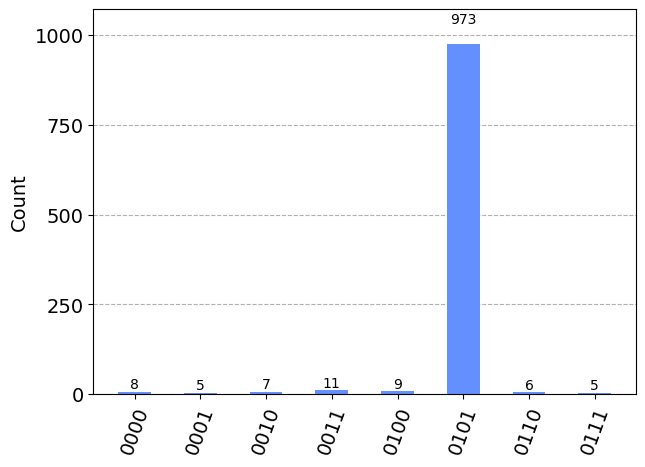

In [48]:
plot_histogram(aer_simulate_circuit(qc)) 